In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [508]:
df = pd.read_csv("loan.csv")

In [509]:
# Shape of data
print ('Total number of loan applicants - ', df.shape[0])

Total number of loan applicants -  39717


## Data Cleaning

As a part of pre-processing step, let's perform some data cleaning activity, remove outliers if any and fill the data from reliable sources.
- Remove rows containing missing values
- Remove outliers
- Extract useful information and drop columns if not required

## Remove rows containing missing values

**1. loan_status**

Different unique types of loan status recorded by LC

In [49]:
print ('Loan status: ', df['loan_status'].unique())

Loan status:  ['Fully Paid' 'Charged Off' 'Current']


**2. grade, sub_grade**

In [48]:
print ('Loan grades: ', df['grade'].unique())
print ('Loan subgrades: ', df['sub_grade'].unique())

Loan grades:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Loan subgrades:  ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


**3. term**

Lending club offers loans only for a tenure of either 3 years or 5 years. Let's check the tenure from given data

In [50]:
print ('Loan tenure: ', df['term'].unique())

Loan tenure:  [' 36 months' ' 60 months']


**4. issue_d**

The data provided contains the loan data issued for the mentioned years

In [624]:
df['issue_year'] = df['issue_d'].apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)
print ('Loan issue years: ', df['issue_year'].unique())

Loan issue years:  [2011 2010 2009 2008 2007]


In [625]:
yearly_loan_status = pd.pivot_table(data=df, columns=df["loan_status"], index=df["issue_year"], values="issue_year", fill_value=0, aggfunc=len)
absolute_yearly_loan_status = yearly_loan_status[['Charged Off', 'Current', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)
absolute_yearly_loan_status

loan_status,Charged Off,Current,Fully Paid
issue_year,,,
2007,33.333333,0.000000,66.666667
2008,15.194682,0.000000,84.805318
2009,12.426703,0.000000,87.573297
2010,12.283290,0.000000,87.716710
2011,14.692646,5.276693,80.030661


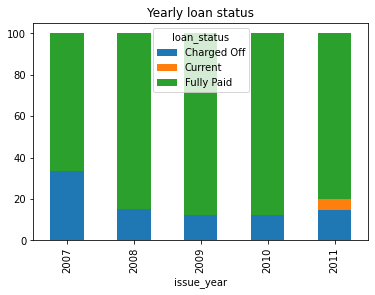

In [626]:
absolute_yearly_loan_status.plot(kind="bar", stacked=True, title="Yearly loan status")
plt.show()

**There isn't much difference do we see in the different types of loan applications across the loan issue year.** 
From the plot above, we can observe that the proportion of charged off loan applicants in the years 2008-2011 is almost the same. Besides, the data from loan issue year 2007 won't be of much use since that is a historical data 5 years back. We can continue to drop this column.

In [627]:
df.drop('issue_d', axis=1, inplace=True)
df.drop('issue_year', axis=1, inplace=True)

**5. emp_title**

In [517]:
df [df['emp_title'].isnull() == True].shape[0]

2459

Let's see if this column has any importance to our data analysis

In [519]:
df['emp_title'].nunique()

28820

Since there are too many employee titles present in the data, we cannot categorise it into another variable to analyse the loan applicant. We can remove this column.

In [521]:
df.drop('emp_title', axis=1, inplace=True)

**6. title , purpose** 

In [528]:
df['title'].unique()

array(['bike', 'personel', 'Personal', ..., "P's Family Credit Loan",
       'My Credit Card Loan', 'Retiring credit card debt'], dtype=object)

In [527]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.478045
credit_card           0.129556
other                 0.099469
home_improvement      0.074024
major_purchase        0.054727
small_business        0.039562
car                   0.039267
wedding               0.024478
medical               0.017339
moving                0.014547
house                 0.009394
vacation              0.009179
educational           0.008025
renewable_energy      0.002389
Name: purpose, dtype: float64

Looks like purpose column is a parent category for title. Dropping title column as that won't be of much use if we have the purpose column

In [529]:
df.drop('title', axis=1, inplace=True)

**7. all_util**

In [536]:
df['all_util'].value_counts()

Series([], Name: all_util, dtype: int64)

In [537]:
df.drop('all_util', axis=1, inplace=True)

**8. application_type**

In [543]:
df['application_type'].value_counts()

INDIVIDUAL    37258
Name: application_type, dtype: int64

Dropping this column as there is no other cateorical value to compare and this has no importance to our analysis

In [544]:
df.drop('application_type', axis=1, inplace=True)

**9. chargeoff_within_12_mths**

In [546]:
df['chargeoff_within_12_mths'].value_counts()

0.0    37211
Name: chargeoff_within_12_mths, dtype: int64

In [549]:
df.drop('chargeoff_within_12_mths', axis=1, inplace=True)

**10. emp_length**

In [551]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Let's check the number of charged off loan applications in each of the above employee tenures

In [553]:
df_emp_length_data = pd.pivot_table(data=df, index=df['emp_length'], columns=df['loan_status'], values='emp_length', aggfunc='count')
df_emp_length_data

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,435,67,2632
10+ years,1270,379,6886
2 years,547,95,3631
3 years,534,81,3367
4 years,447,91,2819
5 years,436,86,2655
6 years,296,59,1803
7 years,254,59,1409
8 years,198,44,1193


In order to infer something from the above data, we need to calculate the absolute values of count or percentage of data under each loan status. 

In [559]:
df_emp_length_data_abs = df_emp_length_data[['Charged Off', 'Current', 'Fully Paid']].apply(lambda x: 100*x/x.sum(), axis=1)
df_emp_length_data_abs

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,13.880026,2.137843,83.982131
10+ years,14.879906,4.440539,80.679555
2 years,12.801311,2.223262,84.975427
3 years,13.410347,2.034154,84.555500
4 years,13.315460,2.710754,83.973786
5 years,13.723639,2.706956,83.569405
6 years,13.716404,2.734013,83.549583
7 years,14.750290,3.426249,81.823461
8 years,13.797909,3.066202,83.135889


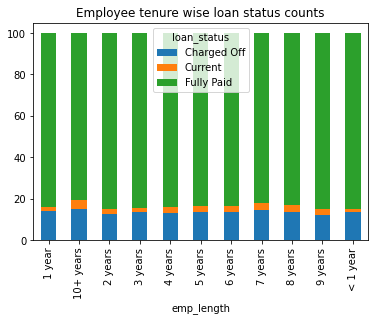

In [560]:
df_emp_length_data_abs.plot(kind="bar", stacked=True, title="Employee tenure wise loan status counts")
plt.show()

We can drop this column since the proportion of charged off loan applicant count across different employee tenure is same.

In [561]:
df.drop('emp_length', axis=1, inplace=True)

**11. mort_acc**

In [ ]:
df['mort_acc'].isna().sum()

Dropping this as all values are NA and we don't have any reliable source to fill in the data

In [571]:
df.drop('mort_acc', axis=1, inplace=True)

In [573]:
df['total_acc'].value_counts()

17    1371
16    1369
15    1368
14    1363
20    1353
      ... 
87       1
72       1
73       1
76       1
78       1
Name: total_acc, Length: 80, dtype: int64

**12. pub_rec_bankruptcies**

In [574]:
df['pub_rec_bankruptcies'].value_counts()

0.0    35090
1.0     1507
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [579]:
missing_values_pub_rec_bankruptcies = df['pub_rec_bankruptcies'].isna().sum()
print (missing_values_pub_rec_bankruptcies)

654


In [580]:
perc_miss_val_pub_rec_bankruptcies = missing_values_pub_rec_bankruptcies/df.shape[0] * 100
print (perc_miss_val_pub_rec_bankruptcies)

1.7553277148531858


Since the missing rows account for only **1.76%** of the total data, we can remove these rows

In [582]:
df = df[-df['pub_rec_bankruptcies'].isna()]
print ('Total number of loan applications = ', df.shape[0])

Total number of loan applications =  36604


**13. tax_liens**

In [593]:
df['tax_liens'].value_counts()

0.0    36604
Name: tax_liens, dtype: int64

In [594]:
df.drop('tax_liens', axis=1, inplace=True)

/Users/veniladri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**14. zip_code**

In [598]:
df['zip_code'].value_counts()

100xx    542
945xx    511
112xx    483
606xx    477
070xx    443
        ... 
461xx      1
332xx      1
252xx      1
379xx      1
963xx      1
Name: zip_code, Length: 806, dtype: int64

Dropping this column as well since the value is masked and is of no importance to our data analysis

In [599]:
df.drop('zip_code', axis=1, inplace=True)

**15. url**

Dropping this attribute as well

In [600]:
df.drop('url', axis=1, inplace=True)

**16. revol_util**

In [602]:
df['revol_util'].isna().sum()

46

In [603]:
df['revol_util'].isna().sum()/df.shape[0] * 100

0.12566932575674788

Since revol_util or *revolving line of credit utilisation* is an important factor creditors use to decide whether to lend money or not, having NA in these values won't be of much help to our analysis. We shall remove those rows. Such rows accounts for only **0.12%** of the total data.

In [605]:
df = df[df['revol_util'].isna() == False]

**Sanitising revol_util**

In [612]:
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1])/100 if(x[-1]=='%') else float(x))

# Analysing Target variables
To identify the driving factors that leads to financial loss to the lending company, we will have to figure out the target variables that is causing the loan applicants to default on their loans. We will analyse different combinations of the variables to find any patterns in the data.

To analyse the statistics and find any patterns, we will categorise the target variable based on the following two factors:
- Customers personal details like occupation, employment, etc.
- Loan details like loan amount, debt to income ratio, etc

On the basis of these factors, let us categorise each columns in the data frame and analyse them separately. We will be using the column **loan_status** to analyse the type of data in each of these attributes and correlate them

## Customer's Personal details columns (Customer attributes)
1. annual_income
2. home_ownership
3. inq_fi
5. verification_status

## Loan and credit details columns (Loan attributes)
1. dti
2. installment
3. int_rate
4. loan_amnt
5. pub_rec
6. pub_rec_bankruptcies
7. revol_bal
8. revol_util
9. grade
10. sub_grade

## Loan applicants in each loan status
We will try to find out the number of loan applications who are fully paid, charged off or current and see the percentage of loan applicants in each category.

In [628]:
df['loan_status'].value_counts()

Fully Paid     30475
Charged Off     5016
Current         1067
Name: loan_status, dtype: int64

## Loan status in each loan grades
We will check the count of loan applicants against each LC grade in different loan statuses

In [618]:
df_by_grades = pd.pivot_table(data=df, columns=df['loan_status'], index=df['grade'], values='grade', fill_value=0, aggfunc='count')
df_by_grades

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,522,35,8641
B,1269,318,9484
C,1193,250,6021
D,995,212,3689
E,656,169,1834
F,286,67,617
G,95,16,189


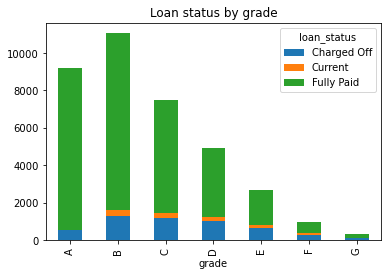

In [619]:
df_by_grades.plot(kind='bar', stacked=True, title='Loan status by grade')
plt.show()

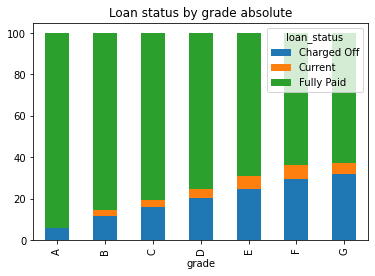

In [621]:
df_by_grades_absolute = df_by_grades[['Charged Off', 'Current', 'Fully Paid']].apply(lambda x: 100 * x/x.sum(), axis=1)
df_by_grades_absolute.plot(kind='bar', stacked=True, title='Loan status by grade absolute')
plt.show()

From the above plots, we can infer that charged off loan applicants are more towards the lower grades(towards G) and less towards the higher grades(towards A).

### Finding correlation among loan details attributes
Let's analyse the correlation among different loan attriutes and try to find the pattern. We will be using these columns to find the correlation: *dti, installment, int_rate, loan_amnt, pub_rec, pub_rec_bankruptcies, revol_bal, revol_util, grade, sub_grade, open_acc*

In [630]:
columns = ['purpose','home_ownership','loan_status','installment', 'int_rate', 'loan_amnt', 'pub_rec_bankruptcies', 'revol_util','revol_bal', 'dti', 'open_acc', 'total_acc', 'annual_inc']
df_corr = df[columns]
df_corr['int_rate'] = df_corr['int_rate'].apply(lambda x: float(x[:-1])/100 if(x[-1]=='%') else float(x))
df_corr.head()

<ipython-input-630-1df0b6f03d5d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,purpose,home_ownership,loan_status,installment,int_rate,loan_amnt,pub_rec_bankruptcies,revol_util,revol_bal,dti,open_acc,total_acc,annual_inc
1,car,RENT,Charged Off,59.83,0.1527,2500,0.0,0.094,1687,1.00,3,4,30000.0
3,other,RENT,Fully Paid,339.31,0.1349,10000,0.0,0.210,5598,20.00,10,37,49200.0
4,other,RENT,Current,67.79,0.1269,3000,0.0,0.539,27783,17.94,15,38,80000.0
5,wedding,RENT,Fully Paid,156.46,0.0790,5000,0.0,0.283,7963,11.20,9,12,36000.0
6,debt_consolidation,RENT,Fully Paid,170.08,0.1596,7000,0.0,0.856,17726,23.51,7,11,47004.0


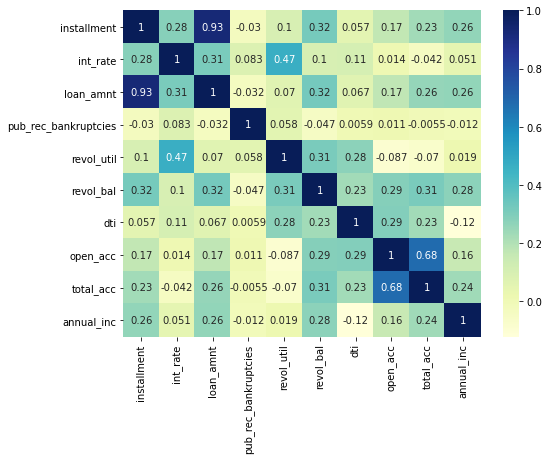

In [631]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Correlating variables
From the above correlation plot, we can see loan_amnt and installment has a perfect correlation. Let's analyse of these variables against the loan_status 

**loan_amnt v/s loan_status**

For our analysis, we will not be analysing the loans which are in "Current" status as we don't know whether they will fully pay the loan or get charged off.

In [456]:
df_corr = df_corr[-df_corr['loan_status'].isin(['Current'])]

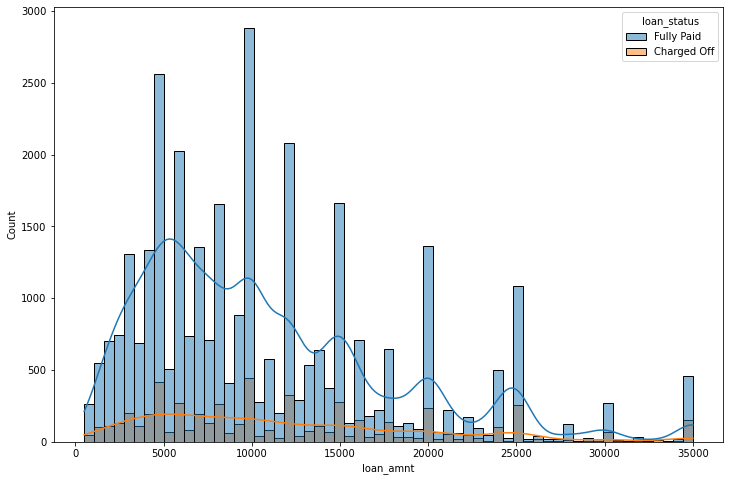

In [457]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_corr, x='loan_amnt', hue='loan_status', kde=True)
plt.show()

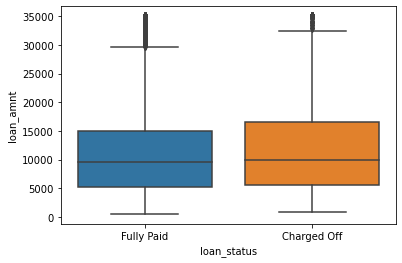

In [458]:
sns.boxplot(data=df_corr, x='loan_status', y='loan_amnt')
plt.show()

### Number of charged off applicants

In [459]:
df_charged_off_loan_applicants = df_corr[df_corr['loan_status']=='Charged Off']
print ('Number of charged off applicants = ', df_charged_off_loan_applicants.shape[0])

Number of charged off applicants =  5627


## Removing outliers for Charged Off loan applicants
From the box plot, we can see that there are outliers for the loan applications which are 'Charged Off'. We can remove those data for the matter of our data analysis.

In [460]:
# Check the number of charged off applicants with loan amount > 31000
df_charged_off_loan_applicants[ df_charged_off_loan_applicants['loan_amnt'] >= 31000].shape[0]

176

In [461]:
df_charged_off_loan = df_charged_off_loan_applicants[(df_charged_off_loan_applicants['loan_amnt'] < 31000)]
print (df_charged_off_loan.shape)

(5451, 13)


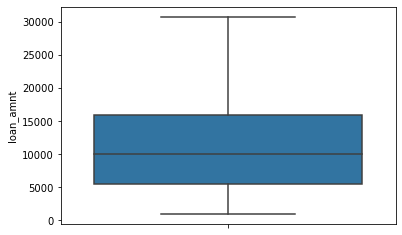

In [462]:
sns.boxplot(data=df_charged_off_loan, y='loan_amnt')
plt.show()

In [463]:
# Analysing the loan amount data, we can see that mean is 11,377.
df_charged_off_loan['loan_amnt'].describe()

count     5451.000000
mean     11377.476610
std       7110.634194
min        900.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      30800.000000
Name: loan_amnt, dtype: float64

In [464]:
fig = px.histogram(df_charged_off_loan, x="loan_amnt", nbins=20, title='Loan amount for charged off applicants')
fig.show()

From the above histogram, we can see that the count of loan applications who are charged off are those applicants who has loan amount in the range **2,000 - 16,000** with the maxima at the range of **4000 - 5990**

In [ ]:
df_loan_amnt_5k_charged_off = df_charged_off_loan[ df_charged_off_loan['loan_amnt'].between(2000,5990)]
print("Number of charged off loan applicants with loan amount between 2000-5990 : ", df_loan_amnt_5k_charged_off.shape[0])

### Customer attributes

Analysing **home_ownership** variable

In [423]:
df_home_ownerhip = pd.pivot_table(data=df_corr, index=df['home_ownership'], columns=df['loan_status'], values='home_ownership', fill_value=0, aggfunc='count')
df_home_ownerhip

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327,638,14694
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
RENT,2839,419,15641


Let's analyse the loan applicants who are defaulted on their loan. From the pivot table data, we can observe that the applicants who usually stay on RENT are more liable to default on their loans. 

In [450]:
df_home_rent = df_charged_off_loan_applicants[ (df_charged_off_loan_applicants['home_ownership'] == 'RENT')]
df_home_rent_purpose = pd.pivot_table(data=df_home_rent, index=df_home_rent['purpose'], columns=df_home_rent['loan_status'], values='purpose', aggfunc='count')
df_home_mortgage = df_charged_off_loan_applicants[ (df_charged_off_loan_applicants['home_ownership'] == 'MORTGAGE')]
df_home_mortgage_purpose = pd.pivot_table(data=df_home_mortgage, index=df_home_mortgage['purpose'], columns=df_home_mortgage['loan_status'], values='purpose', aggfunc='count')

In [451]:
fig = px.bar(df_home_rent_purpose, title='Charged off loan applicants by purpose for rented customers')
fig.show()

In [452]:
fig = px.bar(df_home_mortgage_purpose, title='Charged off loan applicants by purpose for mortgage customers')
fig.show()

We can see that **debt_consolidation** is the major concern for both types of customers. Besides, applicants are defaulted on loans who applied against **credit_card** payment. For MORTGAGE customers, we can also see 266 applicants applying for loan on **home_improvement** have defaulted.

### Customer's reported annual income (annual_inc)
Let's perform data cleaning activity for annual_inc

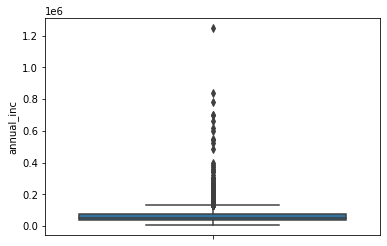

In [470]:
sns.boxplot(data=df_charged_off_loan_applicants, y='annual_inc')
plt.show()

We can see outliers implying customer's reporting their annual income extensively to a large extend. If these customer's truly have the reported annual income, they shouldn't have been defaulted on their loans. Let' remove these outliers and focus on annual_inc < 0.2M

In [487]:
df_high_reported_annual_inc = df_charged_off_loan_applicants[ df_charged_off_loan_applicants['annual_inc'] > 120000 ].sort_values(by='annual_inc', ascending=False)
df_high_reported_annual_inc.head()

,purpose,home_ownership,loan_status,installment,int_rate,loan_amnt,pub_rec,pub_rec_bankruptcies,revol_bal,dti,open_acc,total_acc,annual_inc
10621,debt_consolidation,MORTGAGE,Charged Off,358.85,0.1299,15775,0,0.0,48258,21.81,10,28,1250000.00
30011,moving,RENT,Charged Off,417.93,0.1533,12000,0,0.0,36642,2.34,15,38,840000.00
25643,major_purchase,RENT,Charged Off,131.93,0.1149,6000,0,0.0,5415,0.27,5,6,780000.00
26675,debt_consolidation,MORTGAGE,Charged Off,633.89,0.1793,25000,0,0.0,29240,2.14,10,13,700053.85
34699,home_improvement,MORTGAGE,Charged Off,682.74,0.1392,20000,0,0.0,6960,3.09,8,14,700000.00


In [488]:
df_high_reported_annual_inc.shape[0]

348

In [490]:
df_reported_annual_inc = df_charged_off_loan_applicants[ df_charged_off_loan_applicants['annual_inc'] < 120000 ]
df_reported_annual_inc.shape[0]

5223

In [496]:
df_reported_annual_inc['annual_inc'].describe()

count      5223.000000
mean      53797.606104
std       23172.847611
min        4080.000000
25%       36000.000000
50%       50000.000000
75%       69000.000000
max      119400.000000
Name: annual_inc, dtype: float64

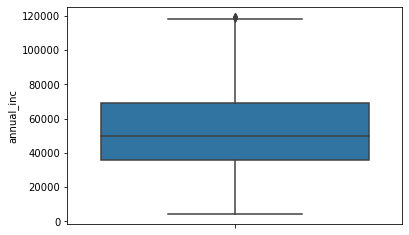

In [492]:
sns.boxplot(data=df_reported_annual_inc, y='annual_inc')
plt.show()

**Let's remove these 60 rows as it will impact our data analysis for customers having proper reported annual income**

In [494]:
fig = px.histogram(df_reported_annual_inc, x="annual_inc", nbins=10, title='Annual income for charged off applicants')
fig.show()

**Inference**: Customers with annual income in the range **40K - 60K** are more likely to default on their loans.

### Bivariate analysis of annual_inc and dti
Let's see the trend of ***dti*** for these defaulted customers
From the correlation matrix, we saw that there is a negative correlation between the two attributes though less. The dti is high for customers with low annual income. We can see that from the scatter plot below.

In [500]:
fig = px.scatter(df_reported_annual_inc, x='annual_inc', y='dti', color='dti', trendline="ols")
fig.show()